<a href="https://colab.research.google.com/github/guofeng201507/NUS_IS_PR/blob/master/GUOFENG_ML_Algo_Master_Base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

pd.set_option('display.max_columns', 500)

df = pd.read_csv(r'/content/application_train.csv')
df.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

Feature engineering has a greater return on investment than model building and hyperparameter tuning. 

In [0]:
df.dropna(thresh=len(df) * 0.7, axis=1, inplace=True)

df.drop(['SK_ID_CURR'], axis=1, inplace=True)
df.shape

#Label Encoding for column with 2 or less values
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le_count = 0

# Iterate through the columns
for col in df:
    if df[col].dtype == 'object':

        if len(list(df[col].unique())) <= 2:
            le.fit(df[col])
            df[col] = le.transform(df[col])

            le_count += 1
            
print('%d columns were label encoded.' % le_count)


#One -hot encoding for categorical data
df = pd.get_dummies(df)
df.shape


#Fill missing value
null_columns = df.columns[df.isnull().any()]
for null_column in null_columns:
    df[null_column] = df[null_column].fillna(df[null_column].mean())

null_columns = df.columns[df.isnull().any()]
print(df[null_columns].isnull().sum())


#log transform
import numpy as np
df['AMT_INCOME_TOTAL_LOG'] = np.log(df['AMT_INCOME_TOTAL'])
df['AMT_CREDIT_LOG'] = np.log(df['AMT_CREDIT'])
df['AMT_ANNUITY_LOG'] = np.log(df['AMT_ANNUITY'])
df['AMT_GOODS_PRICE_LOG'] = np.log(df['AMT_GOODS_PRICE'])
df.drop(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE'], axis=1,inplace = True)

df['YEARS_BIRTH_LOG'] = np.log(df['DAYS_BIRTH'].abs()/365)
df.loc[df.DAYS_EMPLOYED >= 0, 'DAYS_EMPLOYED'] = np.NaN 
df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'].fillna(df['DAYS_EMPLOYED'].mean())
df['YEARS_EMPLOYED_LOG'] = np.log(df['DAYS_EMPLOYED'].abs()/365)

df.loc[df.DAYS_REGISTRATION >= 0, 'DAYS_REGISTRATION'] = np.NaN 
df['DAYS_REGISTRATION'] = df['DAYS_REGISTRATION'].fillna(df['DAYS_REGISTRATION'].mean())
df['YEARS_REGISTRATION_LOG'] = np.log(df['DAYS_REGISTRATION'].abs()/365)

df.loc[df.DAYS_ID_PUBLISH >= 0, 'DAYS_ID_PUBLISH'] = np.NaN 
df['DAYS_ID_PUBLISH'] = df['DAYS_ID_PUBLISH'].fillna(df['DAYS_ID_PUBLISH'].mean())
df['YEARS_ID_PUBLISH_LOG'] = np.log(df['DAYS_ID_PUBLISH'].abs()/365)

df.loc[df.DAYS_LAST_PHONE_CHANGE >= 0, 'DAYS_LAST_PHONE_CHANGE'] = np.NaN 
df['DAYS_LAST_PHONE_CHANGE'] = df['DAYS_LAST_PHONE_CHANGE'].fillna(df['DAYS_LAST_PHONE_CHANGE'].mean())
df['YEARS_LAST_PHONE_CHANGE_LOG'] = np.log(df['DAYS_LAST_PHONE_CHANGE'].abs()/365)

df.drop(['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE'], axis=1,inplace = True)

df.shape

3 columns were label encoded.
Series([], dtype: float64)


(307511, 163)

In [0]:
df.describe(include='all')


,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,REGION_POPULATION_RELATIVE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATIO

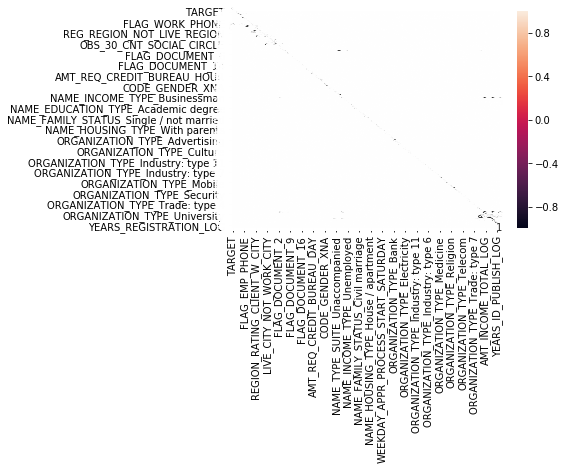

In [0]:
import seaborn as sns
#Skip as very time consuming
# sns.pairplot(df, hue='TARGET')

sns.heatmap(df.corr(), annot=True)

Split data

In [0]:
y = df['TARGET']
X = df.drop('TARGET', axis=1)

from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 / 4, random_state=5)

print(X_train.shape)
print(X_test.shape)                                                                                                         


(230633, 162)
(76878, 162)


Try Scaler

In [0]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


Try Normalizer

In [0]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()
normalizer.fit(X_train)

X_train = normalizer.transform(X_train)
X_test = normalizer.transform(X_test)


In [0]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

# # random oversampling
# # ros = RandomOverSampler(random_state=0)
# ros = SMOTE(ratio='auto', kind='regular')
# X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
# # using Counter to display results of naive oversampling
# from collections import Counter
# print(sorted(Counter(y_resampled).items()))

u_ros = RandomUnderSampler(random_state=0)
# X_under_resampled, y_under_resampled = u_ros.fit_resample(X_train, y_train)
X_resampled, y_resampled = u_ros.fit_resample(X_train, y_train)
# using Counter to display results of naive oversampling
from collections import Counter
print(sorted(Counter(y_resampled).items()))
# print(sorted(Counter(y_under_resampled).items()))
#Option 1: Logistic regression
benchmark_cols = ['Variance retained','n_Components','Time(s)','Accuracy_percentage']
benchmark = pd.DataFrame(columns = benchmark_cols)#https://machinelearningmastery.com/data-preparation-gradient-boosting-xgboost-python/

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


[(0, 18751), (1, 18751)]


#Option 1: log reg


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)
   Variance retained  n_Components     Time(s)  Accuracy_percentage
0                1.0         162.0  944.761392             0.652319
[[46417 24387]
 [ 2342  3732]]
              precision    recall  f1-score   support

           0       0.95      0.66      0.78     70804
           1       0.13      0.61      0.22      6074

    accuracy                           0.65     76878
   macro avg       0.54      0.63      0.50     76878
weighted avg       0.89      0.65      0.73     76878

Accuracy= 0.6523192590858243


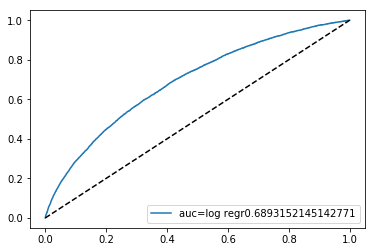

Option 2: xgboost
#Option 2: xgboost
41.39475774765015
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
[[48123 22681]
 [ 1966  4108]]
              precision    recall  f1-score   support

           0       0.96      0.68      0.80     70804
           1       0.15      0.68      0.25      6074

    accuracy                           0.68     76878
   macro avg       0.56      0.68      0.52     76878
weighted avg       0.90      0.68      0.75     76878

Accuracy= 0.6794011290616301


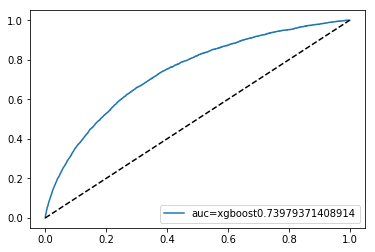

Option 3: Neural Network
Training set score: 0.883
Test set score: 0.605
[[42902 27902]
 [ 2496  3578]]
              precision    recall  f1-score   support

           0       0.95      0.61      0.74     70804
           1       0.11      0.59      0.19      6074

    accuracy                           0.60     76878
   macro avg       0.53      0.60      0.46     76878
weighted avg       0.88      0.60      0.70     76878

Accuracy= 0.6045942922552616


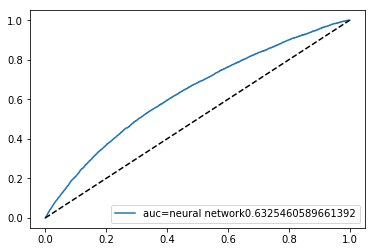

#Option 4: Random Forest


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


classification_report - training:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     18751
           1       1.00      0.98      0.99     18751

    accuracy                           0.99     37502
   macro avg       0.99      0.99      0.99     37502
weighted avg       0.99      0.99      0.99     37502

------------------------------
classification_report - testing:
               precision    recall  f1-score   support

           0       0.95      0.71      0.81     70804
           1       0.14      0.54      0.22      6074

    accuracy                           0.69     76878
   macro avg       0.54      0.62      0.51     76878
weighted avg       0.88      0.69      0.76     76878

Accuracy= 0.693553422305471


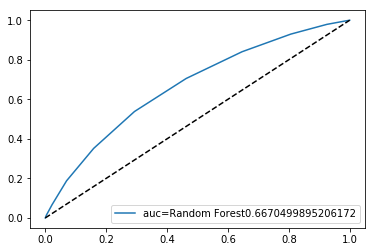

#Option 5: Gradient Boost
classification_report - training:
               precision    recall  f1-score   support

           0       0.69      0.70      0.69     18751
           1       0.69      0.69      0.69     18751

    accuracy                           0.69     37502
   macro avg       0.69      0.69      0.69     37502
weighted avg       0.69      0.69      0.69     37502

------------------------------
classification_report - testing:
               precision    recall  f1-score   support

           0       0.96      0.68      0.80     70804
           1       0.15      0.68      0.25      6074

    accuracy                           0.68     76878
   macro avg       0.56      0.68      0.52     76878
weighted avg       0.90      0.68      0.75     76878

Accuracy= 0.6820416764223836


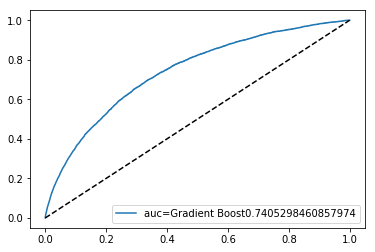

In [0]:
#Option 1: Logistic regression
benchmark_cols = ['Variance retained','n_Components','Time(s)','Accuracy_percentage']
benchmark = pd.DataFrame(columns = benchmark_cols)

print('#Option 1: log reg')
from sklearn.linear_model import LogisticRegression
import time
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
variance = 1.0
n_components = X_train.shape[1]
logisticRegr = LogisticRegression(solver = 'saga', penalty='l1', class_weight='balanced', max_iter=1000)
start = time.time()
logisticRegr.fit(X_train, y_train)
end =  time.time()
timing = end-start
# Predict at Once
y_pred = logisticRegr.predict(X_test)
print(logisticRegr)
# generate evaluation metrics
accuracy = (metrics.accuracy_score(y_test, y_pred))
a = dict(zip(benchmark_cols,[variance,n_components,timing,accuracy]))
benchmark = benchmark.append(a,ignore_index=True)
print(benchmark)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# ROC
from sklearn import metrics
import matplotlib.pyplot as plt

print("Accuracy=", metrics.accuracy_score(y_test, y_pred))

y_pred_proba = logisticRegr.predict_proba(X_test)[::, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr, tpr, label="auc=log regr" + str(auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.legend(loc=4)
plt.show()


#Option 2: xgboost
print('Option 2: xgboost')
import xgboost as xgboost
import time
print('#Option 2: xgboost')
model = xgboost.XGBClassifier()
start = time.time()
model.fit(X_resampled, y_resampled)
end =  time.time()
timing = end-start
print(str(timing))
print(model)
# make predictions for test data
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# ROC
from sklearn import metrics
import matplotlib.pyplot as plt

print("Accuracy=", metrics.accuracy_score(y_test, y_pred))

y_pred_proba = model.predict_proba(X_test)[::, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr, tpr, label="auc=xgboost" + str(auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.legend(loc=4)
plt.show()

#Option 3: Neural Network
print('Option 3: Neural Network')
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='lbfgs', max_iter=1500, alpha=1e-4, hidden_layer_sizes=(120, 30, 30), learning_rate_init=.1)
# mlp = MLPClassifier(solver='sgd', activation='relu',alpha=1e-4,hidden_layer_sizes=(50, 50,50), random_state=1,max_iter=1000,verbose=10,learning_rate_init=.1)
mlp.fit(X_resampled, y_resampled)
print("Training set score: {:.3f}".format(mlp.score(X_resampled, y_resampled)))
print("Test set score: {:.3f}".format(mlp.score(X_test, y_test)))
from sklearn.metrics import confusion_matrix, classification_report
# Confusion Matrix
y_pred = mlp.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# ROC
from sklearn import metrics
import matplotlib.pyplot as plt

print("Accuracy=", metrics.accuracy_score(y_test, y_pred))

y_pred_proba = mlp.predict_proba(X_test)[::, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr, tpr, label="auc=neural network" + str(auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.legend(loc=4)
plt.show()

#Option 4: Random Forest
print('#Option 4: Random Forest')
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_resampled, y_resampled)
y_train_pred = rfc.predict(X_resampled)
y_pred = rfc.predict(X_test)
rfc_proba = rfc.predict_proba(X_test)[:, 1]
print('classification_report - training:\n', classification_report(y_resampled, y_train_pred))
print('-' * 30)
print('classification_report - testing:\n',classification_report(y_test, y_pred))

# ROC
from sklearn import metrics
import matplotlib.pyplot as plt

print("Accuracy=", metrics.accuracy_score(y_test, y_pred))

y_pred_proba = rfc.predict_proba(X_test)[::, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr, tpr, label="auc=Random Forest" + str(auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.legend(loc=4)
plt.show()

#Option 5: Gradient Boost
print('#Option 5: Gradient Boost')
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=0)
gbc.fit(X_resampled, y_resampled)
y_train_pred = gbc.predict(X_resampled)
y_pred = gbc.predict(X_test)
gbc_proba = gbc.predict_proba(X_test)[:, 1]
print('classification_report - training:\n', classification_report(y_resampled, y_train_pred))
print('-' * 30)
print('classification_report - testing:\n',classification_report(y_test, y_pred))


# ROC
from sklearn import metrics
import matplotlib.pyplot as plt

print("Accuracy=", metrics.accuracy_score(y_test, y_pred))

y_pred_proba = gbc.predict_proba(X_test)[::, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr, tpr, label="auc=Gradient Boost" + str(auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.legend(loc=4)
plt.show()

Option 6: Deep Learning using Keras

In [0]:
from keras import Sequential
from keras.layers import Dense

classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(100, activation='relu', kernel_initializer='random_normal', input_dim=162))
#Second  Hidden Layer
classifier.add(Dense(50, activation='relu', kernel_initializer='random_normal'))

#Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

#Compiling the neural network
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

#Fitting the data to the training dataset
classifier.fit(X_resampled, y_resampled, batch_size=100, epochs=500)

#Higher value of batch size will have faster processing speed per step, also it has better result

eval_model=classifier.evaluate(X_resampled, y_resampled)
print(eval_model)

y_pred=classifier.predict(X_test)
y_pred =(y_pred>0.5)

from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))




Epoch 1/500
37502/37502 [==============================] - 2s 49us/step - loss: 0.6246 - acc: 0.6574
Epoch 2/500
37502/37502 [==============================] - 1s 34us/step - loss: 0.6029 - acc: 0.6763
Epoch 3/500
37502/37502 [==============================] - 1s 35us/step - loss: 0.5988 - acc: 0.6803
Epoch 4/500
37502/37502 [==============================] - 1s 35us/step - loss: 0.5952 - acc: 0.6814
Epoch 5/500
37502/37502 [==============================] - 1s 35us/step - loss: 0.5918 - acc: 0.6843
Epoch 6/500
37502/37502 [==============================] - 1s 36us/step - loss: 0.5877 - acc: 0.6868
Epoch 7/500
37502/37502 [==============================] - 1s 34us/step - loss: 0.5850 - acc: 0.6904
Epoch 8/500
37502/37502 [==============================] - 1s 35us/step - loss: 0.5801 - acc: 0.6953
Epoch 9/500
37502/37502 [==============================] - 1s 36us/step - loss: 0.5767 - acc: 0.6976
Epoch 10/500
37502/37502 [==============================] - 1s 36us/step - loss: 0.5722 - a

Accuracy= 0.6495746507453367


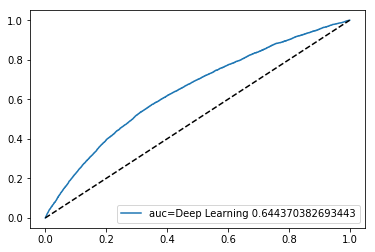

In [0]:
# ROC
from sklearn import metrics
import matplotlib.pyplot as plt

print("Accuracy=", metrics.accuracy_score(y_test, y_pred))

y_pred_proba = classifier.predict_proba(X_test)[::, 0]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr, tpr, label="auc=Deep Learning " + str(auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.legend(loc=4)
plt.show()
